### 官方教程QISKIT上给的$H_2$ 的例子

In [1]:
from qiskit_nature.second_q.drivers import PySCFDriver
driver = PySCFDriver(atom="H 0 0 0; H 0 0 0.735", basis="sto-3g")
problem = driver.run()
from qiskit_nature.second_q.mappers import JordanWignerMapper, QubitConverter
converter = QubitConverter(JordanWignerMapper())

In [2]:
from qiskit_nature.second_q.circuit.library import UCCSD, HartreeFock
ansatz = UCCSD(num_particles = problem.num_particles,num_spatial_orbitals = problem.num_spatial_orbitals,qubit_converter = converter)
initial_state = HartreeFock(num_particles = problem.num_particles,num_spatial_orbitals = problem.num_spatial_orbitals,qubit_converter = converter)
ansatz.initial_state = initial_state

In [3]:
import numpy as np
from qiskit.algorithms.optimizers import SLSQP
from qiskit.algorithms.minimum_eigensolvers import VQE
from qiskit.primitives import Estimator
vqe = VQE(Estimator(), ansatz, SLSQP())
vqe.initial_point = np.zeros(ansatz.num_parameters)
from qiskit.algorithms.minimum_eigensolvers import AdaptVQE
adapt_vqe = AdaptVQE(vqe)
adapt_vqe.supports_aux_operators = lambda: True  # temporary fix
from qiskit_nature.second_q.algorithms import GroundStateEigensolver
solver = GroundStateEigensolver(converter, adapt_vqe)
result = solver.solve(problem)

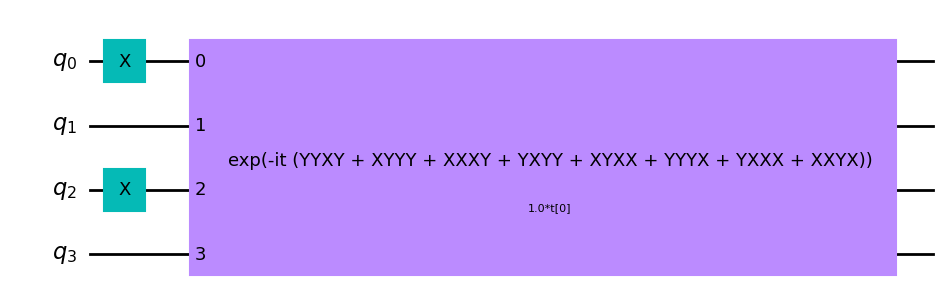

{   'aux_operators_evaluated': {   'AngularMomentum': (0.0, {}),
                                   'Magnetization': (0.0, {}),
                                   'ParticleNumber': (1.9999999999999898, {}),
                                   'XDipole': (0.0, {}),
                                   'YDipole': (0.0, {}),
                                   'ZDipole': (1.3889487015553126, {})},
    'cost_function_evals': 6,
    'eigenvalue': -1.857275030145594,
    'final_max_gradient': -1.9252711517354568e-05,
    'num_iterations': 2,
    'optimal_circuit': <qiskit_nature.second_q.circuit.library.ansatzes.uccsd.UCCSD object at 0x7faa4cb40550>,
    'optimal_parameters': {ParameterVectorElement(t[0]): -0.11176260194602626},
    'optimal_point': array([-0.1117626]),
    'optimal_value': -1.857275030145594,
    'optimizer_evals': None,
    'optimizer_result': <qiskit.algorithms.optimizers.optimizer.OptimizerResult object at 0x7faac92ed8a0>,
    'optimizer_time': 0.1224520206451416,
    'termi

In [4]:
display(result.raw_result.optimal_circuit.decompose(reps=1).draw('mpl'))
print(result.raw_result)

### 自制：1.$H_2 O$ 的例子

In [5]:
from qiskit_nature.second_q.drivers import PySCFDriver
from qiskit_nature.second_q.formats.molecule_info import MoleculeInfo
from qiskit_nature.second_q.transformers import ActiveSpaceTransformer
molecule = MoleculeInfo(
    ["O","H","H"],[(0.0,0.0,0.0),(0.758602, 0.0, 0.504284),(0.758602, 0.0, -0.504284)],
    multiplicity=1,  # = 2*spin + 1
    charge=0,
)

driver = PySCFDriver().from_molecule(molecule)

problem = driver.run()
converter = QubitConverter(JordanWignerMapper())

# Define the active space around the Fermi level 
# (selected automatically around the HOMO and LUMO, ordered by energy)
transformer = ActiveSpaceTransformer(
    num_electrons=2, #how many electrons we have in our active space
    num_spatial_orbitals=3, #how many orbitals we have in our active space
)

problem = transformer.transform(problem=problem)
print('粒子数{0}，空间轨道数 {1}'.format(problem.num_particles,problem.num_spatial_orbitals))
converter = QubitConverter(JordanWignerMapper())

粒子数(1, 1)，空间轨道数 3


In [6]:
from qiskit_nature.second_q.circuit.library import UCCSD, HartreeFock
ansatz = UCCSD(num_particles = problem.num_particles,num_spatial_orbitals = problem.num_spatial_orbitals,qubit_converter = converter)
initial_state = HartreeFock(num_particles = problem.num_particles,num_spatial_orbitals = problem.num_spatial_orbitals,qubit_converter = converter)
ansatz.initial_state = initial_state

In [7]:
import numpy as np
from qiskit.algorithms.optimizers import SLSQP
from qiskit.algorithms.minimum_eigensolvers import VQE
from qiskit.primitives import Estimator
vqe = VQE(Estimator(), ansatz, SLSQP())
vqe.initial_point = np.zeros(ansatz.num_parameters)
from qiskit.algorithms.minimum_eigensolvers import AdaptVQE
adapt_vqe = AdaptVQE(vqe)
adapt_vqe.supports_aux_operators = lambda: True  # temporary fix
from qiskit_nature.second_q.algorithms import GroundStateEigensolver
solver = GroundStateEigensolver(converter, adapt_vqe)
result = solver.solve(problem)
#print(result)
print(result.raw_result)

{   'aux_operators_evaluated': {   'AngularMomentum': (0.0, {}),
                                   'Magnetization': (0.0, {}),
                                   'ParticleNumber': (1.99999999999999, {}),
                                   'XDipole': (0.002401355023556262, {}),
                                   'YDipole': (0.0, {}),
                                   'ZDipole': (0.0, {})},
    'cost_function_evals': 9,
    'eigenvalue': -1.6971878538202514,
    'final_max_gradient': 6.565995795300428e-07,
    'num_iterations': 3,
    'optimal_circuit': <qiskit_nature.second_q.circuit.library.ansatzes.uccsd.UCCSD object at 0x7faa47757310>,
    'optimal_parameters': {   ParameterVectorElement(t[0]): -0.03142928474225513,
                              ParameterVectorElement(t[1]): -0.011082442239591853},
    'optimal_point': array([-0.03142928, -0.01108244]),
    'optimal_value': -1.6971878538202514,
    'optimizer_evals': None,
    'optimizer_result': <qiskit.algorithms.optimizers.optim

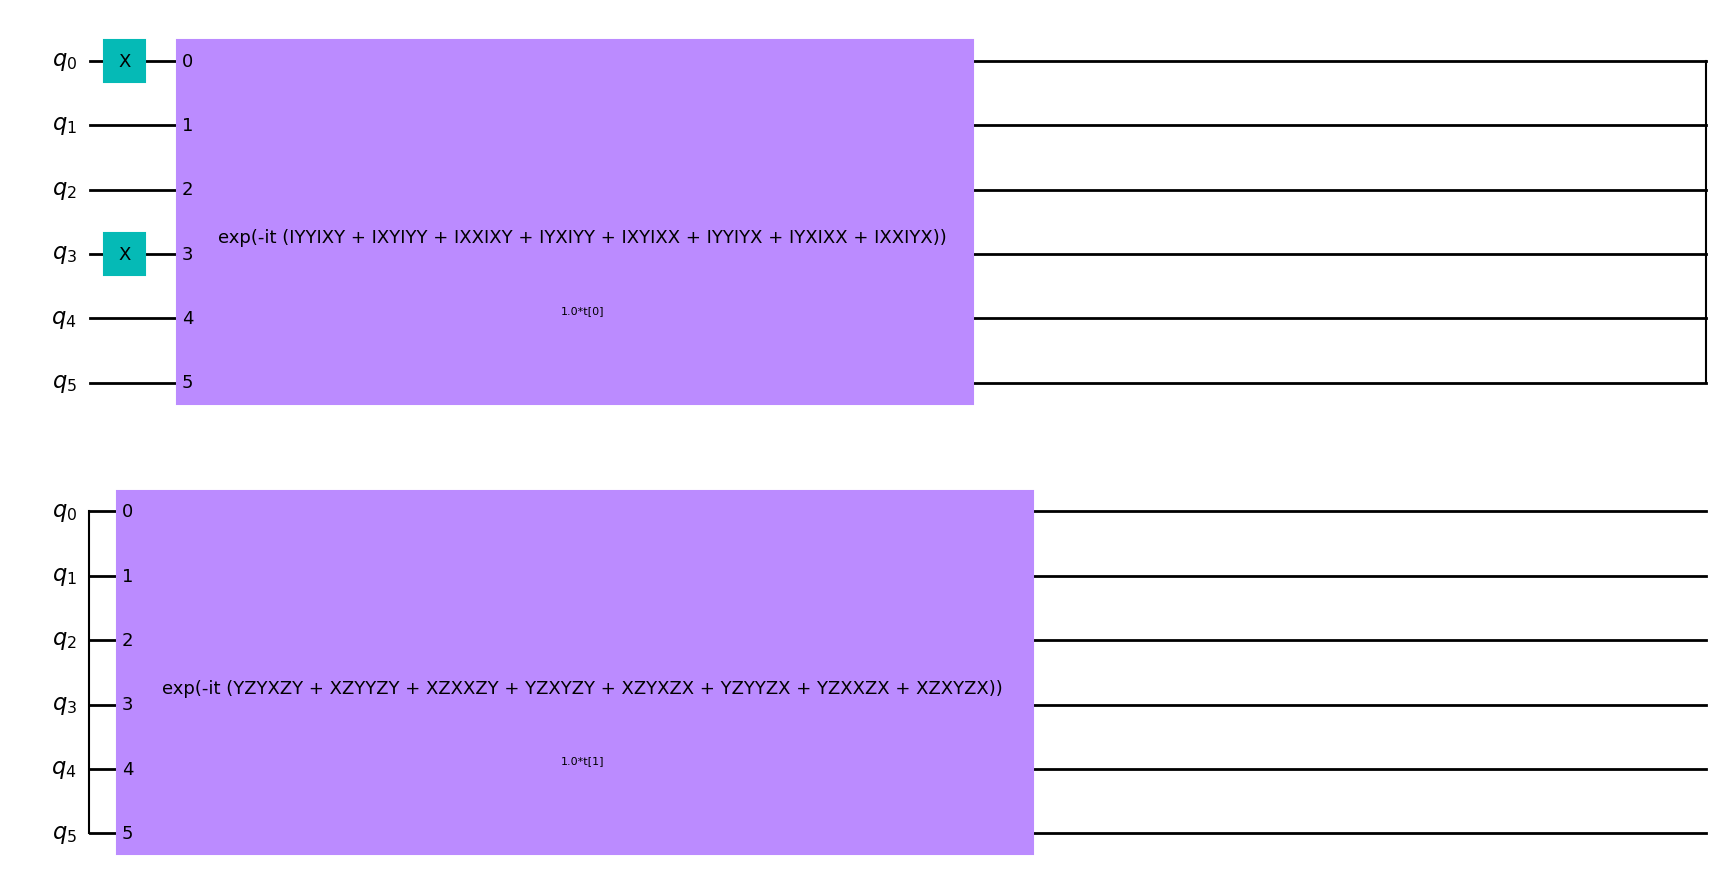

In [8]:
display(result.raw_result.optimal_circuit.decompose(reps=1).draw('mpl'))

### 验证顺序-使用Esitimator()

In [ ]:
from qiskit.primitives import Estimator
#print('分子体系的Hamilton:',problem.hamiltonian.second_q_op()) 
estimator = Estimator()
hamiltonian = problem.hamiltonian.second_q_op()


### 关于commutor的制作
    1.如何定义算符池内的算符？=>如何表示evolve

In [ ]:
adapt_vqe.